<a href="https://colab.research.google.com/github/camilotayac/computational_chemistry-TC/blob/master/Colab/Protein_Region_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧙‍♂️ **Protein** Region Visualization ♾️ Visualización de regiones de **proteínas**


**🇺🇸** - To determine these regions, use the following programmes: [InterPro](https://www.ebi.ac.uk/interpro/), [SMART](https://smart.embl.de/) and [PROSITE](https://prosite.expasy.org/).

**🇪🇸** - Para determinar estas regiones, use los siguientes programas: [InterPro](https://www.ebi.ac.uk/interpro/), [SMART](https://smart.embl.de/) y [PROSITE](https://prosite.expasy.org/).


🐉 **@Tyac**

🏦 **Universidad de Caldas**

🌇 **Manizales - Colombia**

In [ ]:
# @title ## 🟢  Installation of programs and import of required libraries ♾️ Instalación de programas e importación de librerías necesarias
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import itertools

<ipython-input-82-4c80bdda03c7>:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(regiones))


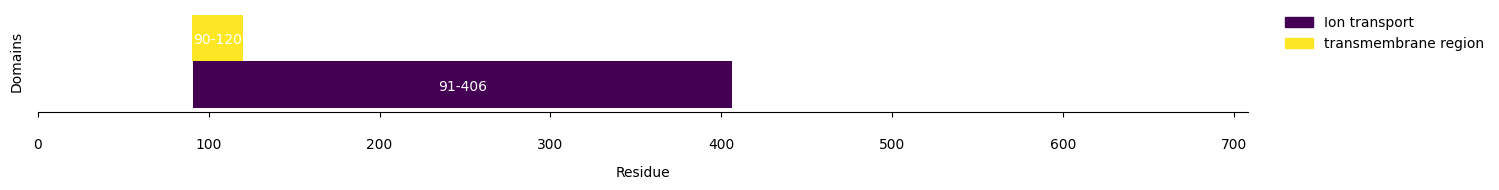

In [82]:

# @title ## 🟢 Variables for analysis ♾️ Variables para análisis


# @markdown ---




# @markdown ### **🇺🇸** -  Set the range for residues from start to end.

# @markdown ### **🇪🇸** -  Establece el rango para los residuos desde el inicio hasta el final.
inicio_residuos = 1  # @param {"type":"integer"}

fin_residuos = 708  # @param {"type":"integer"}
# @markdown ---

# Definir la secuencia de residuos y las regiones destacadas
residuos = list(range(inicio_residuos, fin_residuos + 1))  # Suponiendo una secuencia de residuos desde inicio hasta fin

# @markdown ### **🇺🇸** - Define regions (start, end, and name)
# @markdown ### **🇺🇸** - **🔴 NOTE:** Enter regions with start, end, and label separated by commas. Multiple regions should be separated by a semicolon (;).
# @markdown ### **🇪🇸** - Definir las regiones (inicio, fin, y nombre)
# @markdown ### **🇪🇸** - **🔴 NOTA:** Ingrese las regiones con inicio, fin y etiqueta separados por comas. Varias regiones deben estar separadas por un punto y coma (;).
file_name = "91,406,Ion transport;90,120,transmembrane region"  # @param {type:"string"}
# @markdown ---

# Generar niveles Y automáticamente
niveles_y = {}
nivel_actual = 1.0

# Procesar la información manual y agregarla a la lista de regiones
regiones = []  # Se definirán manualmente
for linea in file_name.strip().split(';'):
    inicio, fin, nombre = linea.split(',')
    nombre = nombre.strip()
    if nombre not in niveles_y:
        niveles_y[nombre] = nivel_actual
        nivel_actual += 1.0
    regiones.append((int(inicio.strip()), int(fin.strip()), nombre, niveles_y[nombre]))


# @markdown ### **🇺🇸** - Number of DPI for the image
# @markdown ### **🇪🇸** - Número de DPI para la imagen

dpi = 500 # @param {type:"slider", min:100, max:1000, step:100}
# @markdown ---

# @markdown ### **🇺🇸** - Select language
# @markdown ### **🇪🇸** - Seleccionar el idioma
tipo_idioma = "English"  # @param ["Spanish", "English"]
# @markdown ---

# @markdown ### **🇺🇸** - Define title for saved images
# @markdown ### **🇪🇸** - Definir el título para guardar las imágenes
titulo = "grafico_residuos"  # @param {type:"string"}

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(15, 2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Generar colores automáticamente
color_map = plt.cm.get_cmap('viridis', len(regiones))
color_cycle = itertools.cycle([color_map(i) for i in range(len(regiones))])  # Utilizar colores de 'viridis' para las regiones
colores = {}

# Graficar las regiones como barras horizontales en diferentes niveles
for inicio, fin, nombre, nivel_y in regiones:
    if nombre not in colores:
        colores[nombre] = next(color_cycle)
    region_label = f'{inicio}-{fin}' if (fin - inicio) >= 30 else ''
    ax.broken_barh([(inicio, fin - inicio)], (nivel_y - 0.2, 1), facecolors=colores[nombre], edgecolor='none')
    if region_label:
        ax.text(inicio + (fin - inicio) / 2, nivel_y + 0.25, region_label, ha='center', va='center', fontsize=10, color='white')

# Definir etiquetas en función del idioma
if tipo_idioma == "Spanish":
    xlabel = "Residuo"
    ylabel = "Dominios"
else:
    xlabel = "Residue"
    ylabel = "Domains"

# Añadir etiquetas y leyenda
ax.set_xlabel(xlabel, labelpad=10)
ax.set_ylabel(ylabel, labelpad=10)
ax.set_xlim(inicio_residuos, fin_residuos)
ax.set_yticks([])
ax.spines['left'].set_color('none')
ax.set_xticks(range(0, fin_residuos, 100))  # Mostrar ticks en intervalos de 100, comenzando desde 1
ax.tick_params(axis='x', pad=15)  # Mover las etiquetas del eje x hacia afuera
ax.legend(handles=[mpatches.Patch(color=colores[nombre], label=nombre) for nombre in colores], loc='upper right', bbox_to_anchor=(1.2, 1), borderaxespad=0., frameon=False)

# Guardar la gráfica
plt.savefig(f'{titulo}.png', format="png", transparent=True, dpi=dpi, bbox_inches='tight')  # Usa la variable dpi_val para los DPI
plt.savefig(f'{titulo}.svg', format="svg", transparent=True, dpi=dpi, bbox_inches='tight')
plt.savefig(f'{titulo}.pdf', format="pdf", transparent=True, dpi=dpi, bbox_inches='tight')

# Mostrar la gráfica
plt.tight_layout()
plt.show()